In [1]:
import numpy as np
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape(60000, 784)

In [4]:
noisy_train_images = train_images + 50*np.random.normal(0, 1, size=train_images.shape) 
noisy_test_images = test_images + 50*np.random.normal(0, 1, size=test_images.shape)

# **Undercomplete autoencoder**

In [5]:
def model_small(weights_init):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, input_shape=(784,), activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(784, activation='relu', kernel_initializer=weights_init)
    ])

    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return model

def model_med(weights_init):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, input_shape=(784,), activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(512, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(784, activation='relu', kernel_initializer=weights_init)
    ])

    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return model

def model_large(weights_init):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, input_shape=(784,), activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(512, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(784, activation='relu', kernel_initializer=weights_init)
    ])

    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return model

In [ ]:
small = model_small('glorot_normal')
med = model_med('glorot_normal')
large = model_large('glorot_normal')

history_small = small.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)
history_med = med.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)
history_large = large.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)

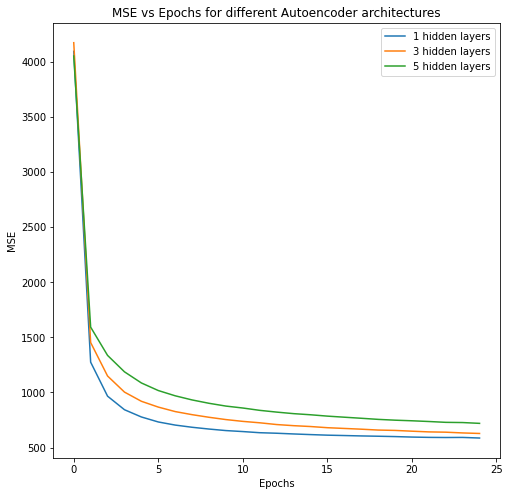

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history_small.history['mse'])
plt.plot(history_med.history['mse'])
plt.plot(history_large.history['mse'])
plt.title("MSE vs Epochs for different Autoencoder architectures")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["1 hidden layers", "3 hidden layers", "5 hidden layers"])
plt.show()

### **Comments**

* All structures do well on the reproducing noisy images.
* We observe that single hidden layered architecture is enough to capture the good patterns in the data, and hence, this is also reproducing good images from noisy counterparts. 
* We can not conclude that smaller architecture is better here, since all smaller, medium and larger models are trained for same number of epochs. It might be the case that larger architectures produce lower MSE if we train NN for more iterations (training for larger architectures is slower). 

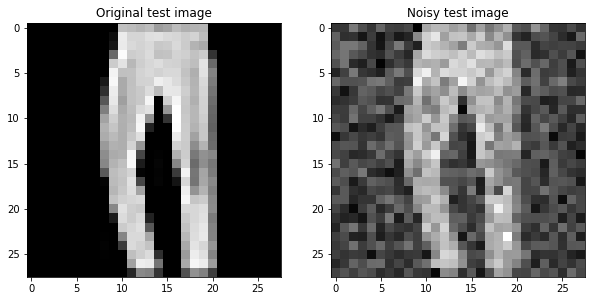

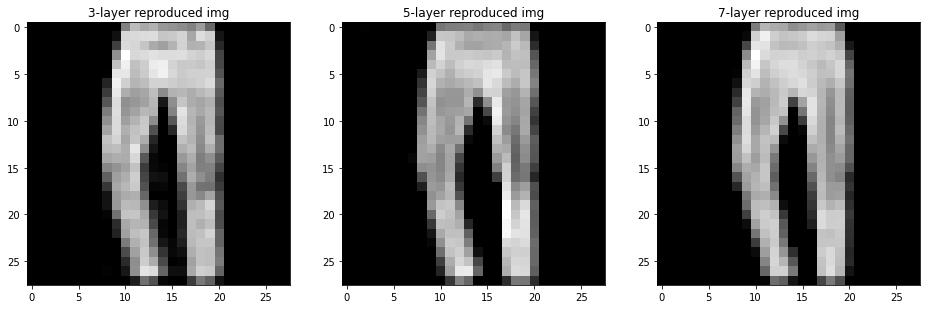

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(test_images[5], cmap='gray')
plt.title("Original test image")
plt.subplot(1, 2, 2)
plt.imshow(noisy_test_images[5], cmap='gray')
plt.title("Noisy test image")
plt.show()

test_small = small.predict(noisy_test_images[5].reshape(1, 784)).reshape(28, 28)
test_med = med.predict(noisy_test_images[5].reshape(1, 784)).reshape(28, 28)
test_large = large.predict(noisy_test_images[5].reshape(1, 784)).reshape(28, 28)


plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(test_small, cmap="gray")
plt.title("3-layer reproduced img")
plt.subplot(1, 3, 2)
plt.imshow(test_med, cmap="gray")
plt.title("5-layer reproduced img")
plt.subplot(1, 3, 3)
plt.imshow(test_large, cmap="gray")
plt.title("7-layer reproduced img")
plt.show()

# **Trying different weight initialization methods**

In [ ]:
med1 = model_med('glorot_normal')
med2 = model_med('he_normal')
med3 = model_med('uniform')

h1 = med1.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)
h2 = med2.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)
h3 = med3.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)

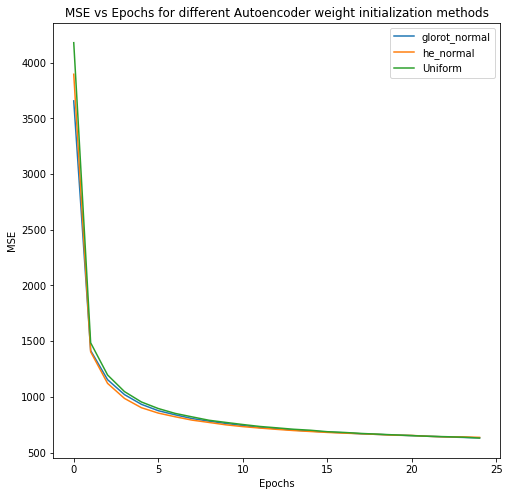

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(h1.history['mse'])
plt.plot(h2.history['mse'])
plt.plot(h3.history['mse'])
plt.title("MSE vs Epochs for different Autoencoder weight initialization methods")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["glorot_normal", "he_normal", "Uniform"])
plt.show()

### **Comments**

* All initialization methods perform nearly same. 
* As saw in pervious labs, he_normal performs slightly better, because of similar reasons (he_normal works better with relu activations.)

# **Overcomplete Autoencoder**

In [ ]:
def model_small(weights_init):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, input_shape=(784,), activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.Dense(784, activation='relu', kernel_initializer=weights_init)
    ])

    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return model

def model_med(weights_init):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, input_shape=(784,), activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.Dense(1024 + 256, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.Dense(1024, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.Dense(784, activation='relu', kernel_initializer=weights_init)
    ])

    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return model

def model_large(weights_init):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, input_shape=(784,), activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.Dense(1024 + 256, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.Dense(1024 + 256 + 128, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.Dense(1024 + 256, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.Dense(1024, activation='relu', kernel_initializer=weights_init),
        tf.keras.layers.Dense(784, activation='relu', kernel_initializer=weights_init)
    ])

    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return model

In [ ]:
small = model_small('glorot_normal')
med = model_med('glorot_normal')
large = model_large('glorot_normal')

history_small = small.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)
history_med = med.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)
history_large = large.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)

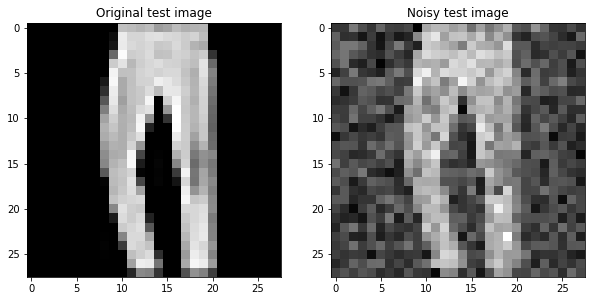

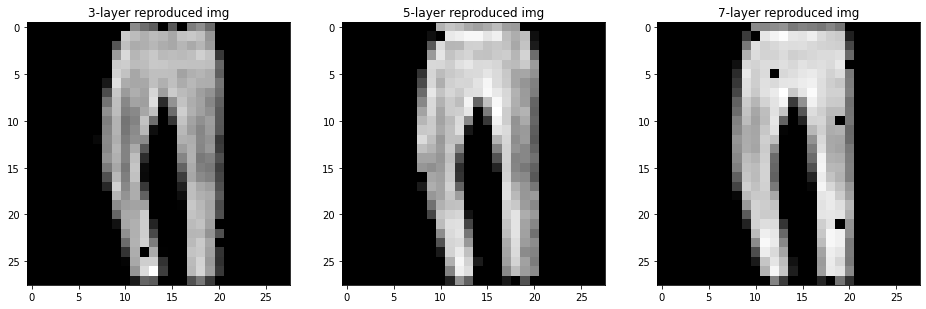

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(test_images[5], cmap='gray')
plt.title("Original test image")
plt.subplot(1, 2, 2)
plt.imshow(noisy_test_images[5], cmap='gray')
plt.title("Noisy test image")
plt.show()

test_small = small.predict(noisy_test_images[5].reshape(1, 784)).reshape(28, 28)
test_med = med.predict(noisy_test_images[5].reshape(1, 784)).reshape(28, 28)
test_large = large.predict(noisy_test_images[5].reshape(1, 784)).reshape(28, 28)


plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(test_small, cmap="gray")
plt.title("3-layer reproduced img")
plt.subplot(1, 3, 2)
plt.imshow(test_med, cmap="gray")
plt.title("5-layer reproduced img")
plt.subplot(1, 3, 3)
plt.imshow(test_large, cmap="gray")
plt.title("7-layer reproduced img")
plt.show()

### **Comments**

* We can clearly see some pepper noise(random black dots) in the reproduced image. This signifies that the model is trying to copy the exact input in the hidden layers, and so, during reproduction, we see random black dots in the output image.

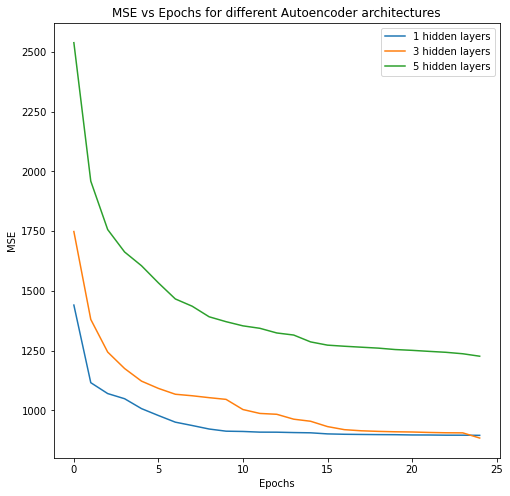

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history_small.history['mse'])
plt.plot(history_med.history['mse'])
plt.plot(history_large.history['mse'])
plt.title("MSE vs Epochs for different Autoencoder architectures")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["1 hidden layers", "3 hidden layers", "5 hidden layers"])
plt.show()

In [6]:
med1 = model_med('glorot_normal')
med2 = model_med('he_normal')
med3 = model_med('uniform')

h1 = med1.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)
h2 = med2.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)
h3 = med3.fit(noisy_train_images, train_images, epochs=25, verbose=0, batch_size=32)

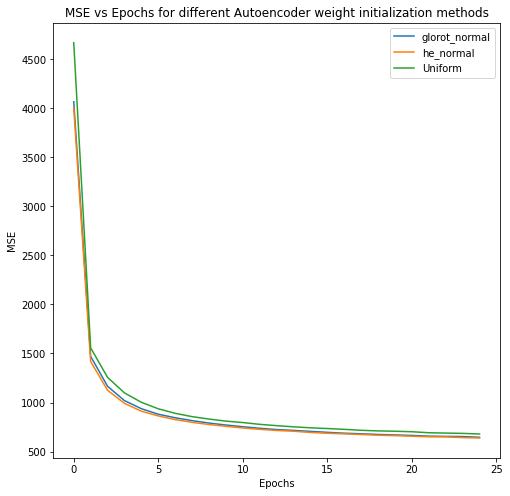

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(h1.history['mse'])
plt.plot(h2.history['mse'])
plt.plot(h3.history['mse'])
plt.title("MSE vs Epochs for different Autoencoder weight initialization methods")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["glorot_normal", "he_normal", "Uniform"])
plt.show()

# **Weight tying in autoencoders**

* For weight tying, we have to share the weights of encoder part, in the decoder part as well. For this, we define our manual `layer` class, which extends `keras.layers.Layer` class, and within this class, we override the call method. This class also implements the initializer to initialise the weights of the layer to same as input weights. In the call method, instead of multiplying with a normal matrix, we multiply with the transpose of weight matrix. (Transpose because the matrix is shared matrix of encoder part, and so in decoder part, we have to transpose it to match the shape of matrix with decoder architecture.)

* This idea has been well explained in this article. https://medium.com/@lmayrandprovencher/building-an-autoencoder-with-tied-weights-in-keras-c4a559c529a2

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

noisy_train_images = train_images + 50*np.random.normal(0, 1, size=train_images.shape) 
noisy_test_images = test_images + 50*np.random.normal(0, 1, size=test_images.shape)

In [9]:
import keras
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)

    def build(self, inp_shape):
        self.biases = self.add_weight(name="bias", shape=self.dense.input_shape[-1], initializer="zeros")
        super().build(inp_shape)

    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

Now we define our custom flow from input to output, instead of directly using tf.fit() function. 

In [10]:
from keras.layers import Dense, Flatten, Input, Reshape

inputs = keras.Input(shape=(28, 28, 1))
dense1 = Dense(784, activation='relu')
dense2 = Dense(512, activation='relu')
dense3 = Dense(256, activation='relu')

x = Flatten()(inputs)

x = dense1(x)
x = dense2(x)
x = dense3(x)

x = DenseTranspose(dense3, activation='relu')(x)
x = DenseTranspose(dense2, activation='relu')(x)
x = DenseTranspose(dense1, activation='relu')(x)

outputs = Reshape([28, 28])(x)

tied_ae = keras.Model(inputs=inputs, outputs=outputs)
tied_ae.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = tied_ae.fit(noisy_train_images, train_images, epochs=20, verbose=0)

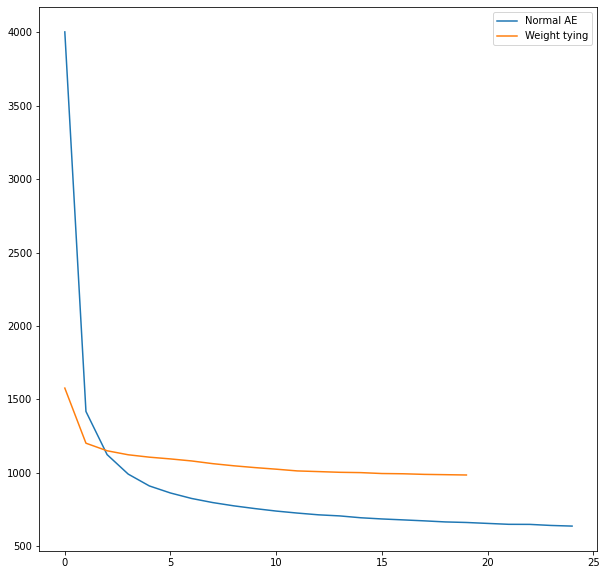

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(h2.history['mse'])
plt.plot(history.history['mse'])
plt.legend(["Normal AE", "Weight tying"])
plt.show()